In [1]:
%matplotlib inline

In [2]:
import numpy as np
import random  as rd
from numba import jit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import math
import random

init_particle:
[[  0.00000000e+00   0.00000000e+00]
 [  1.03127229e+12   0.00000000e+00]
 [  2.87983438e+12   0.00000000e+00]
 [ -7.38251317e+11   0.00000000e+00]
 [ -1.92474395e+12   0.00000000e+00]
 [  9.33277298e+11   0.00000000e+00]
 [ -2.36609303e+11   0.00000000e+00]
 [ -1.86045117e+11   0.00000000e+00]
 [  3.60325171e+10   0.00000000e+00]
 [ -7.26991662e+11   0.00000000e+00]
 [  2.26310085e+11   0.00000000e+00]
 [  4.69807396e+10   0.00000000e+00]
 [ -8.07319829e+11   0.00000000e+00]
 [ -1.04032044e+12   0.00000000e+00]
 [ -1.72930626e+12   0.00000000e+00]
 [  2.32186390e+11   0.00000000e+00]
 [  2.39241881e+12   0.00000000e+00]
 [ -1.02871576e+11   0.00000000e+00]
 [  1.28182032e+12   0.00000000e+00]
 [  1.98762005e+12   0.00000000e+00]
 [  1.69384898e+12   0.00000000e+00]
 [ -3.30425014e+11   0.00000000e+00]
 [  2.32422430e+12   0.00000000e+00]
 [  7.71905300e+11   0.00000000e+00]
 [ -6.09693376e+11   0.00000000e+00]
 [  8.81707399e+11   0.00000000e+00]
 [ -4.42358607e+10   0.

init:
[[  3.90132149e+12   0.00000000e+00]
 [  1.03778416e+12   5.68940775e+09]
 [  2.87982709e+12   3.40426295e+09]
 [ -7.38083274e+11  -6.72166122e+09]
 [ -1.92470785e+12  -4.16346681e+09]
 [  9.33257860e+11   5.98075555e+09]
 [ -2.35785797e+11  -1.18671598e+10]
 [ -1.84641025e+11  -1.33803420e+10]
 [  1.00419643e+10   3.05797028e+10]
 [ -7.26911765e+11  -6.77348917e+09]
 [  2.22032243e+11   1.21523909e+10]
 [  3.18222970e+10   2.67503505e+10]
 [ -8.07293651e+11  -6.42783392e+09]
 [ -1.04039299e+12  -5.66271589e+09]
 [ -1.72929277e+12  -4.39239320e+09]
 [  2.31160078e+11   1.19973926e+10]
 [  2.39170150e+12   3.73502556e+09]
 [ -9.76528554e+10  -1.79805212e+10]
 [  1.28178602e+12   5.10300368e+09]
 [  1.98758724e+12   4.09781085e+09]
 [  1.69383984e+12   4.43902735e+09]
 [ -3.30127995e+11  -1.00442262e+10]
 [  2.32422086e+12   3.78943173e+09]
 [  7.71594577e+11   6.57652182e+09]
 [ -1.07954827e+12  -7.39607831e+09]
 [  8.81726064e+11   6.15324038e+09]
 [ -2.69467903e+10  -2.73588539e

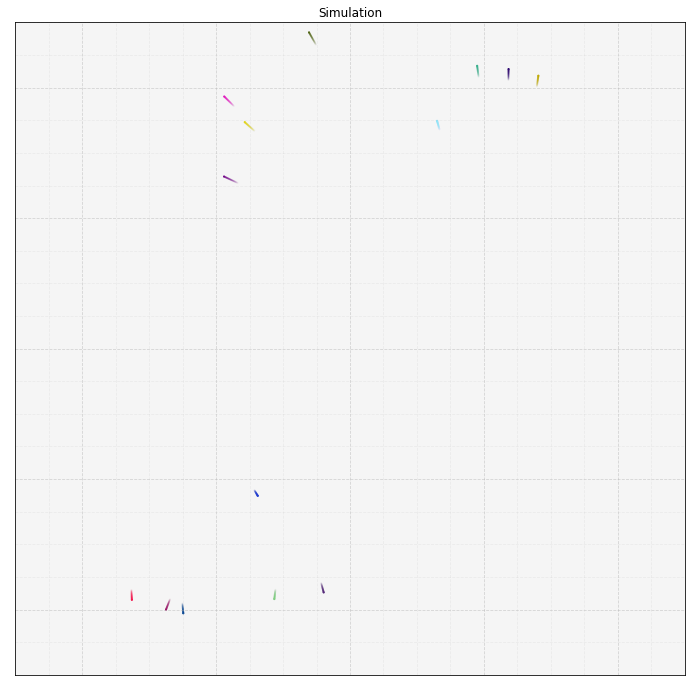

In [3]:
G = 6.67408e-11 # m**3 kg**-1 s**-2 ----- Gravitational constant
nParticles = 150
nStars = 1
planetmass = 5.96e26
nt_simulation = 1200

# =======================================================================
# -----------------------------Positions---------------------------------
# =======================================================================

if nStars == 1:
    init_particle_x = np.hstack(([0], (np.random.normal(0,1,nParticles))*1.5e11*10))
    init_particle_y = [0 for i in range(nParticles + nStars)]
if nStars == 2:
    init_particle_x = np.hstack(([1.5e11*5], [-1.5e11*5],
                                 (np.random.normal(0,1,nParticles))*1.5e11*10))
    init_particle_y = [0 for i in range(nParticles + nStars)]

init_particle = np.vstack((init_particle_x,init_particle_y)).T
print "init_particle:\n", init_particle

particlem = np.hstack(([2e30]*nStars, [planetmass]*nParticles))
com = sum([particlem[j]*init_particle_x[j] for j in range(nParticles + nStars)]) / sum(particlem)

# =======================================================================
# ----------------------------Velocities---------------------------------
# =======================================================================

if nStars == 1:
    init_v_x = [0 for i in range(nParticles + nStars)]
    init_v_y_stars = [0]
    init_v_y_planets = [math.copysign(np.sqrt(G * (particlem[0] / abs(init_particle_x[ii] - com))),
                                      init_particle_x[ii]) for ii in range(nStars,nStars+nParticles)]
    init_v_y = init_v_y_stars + init_v_y_planets
    init_v = np.vstack((init_v_x,init_v_y)).T

if nStars == 2:
    init_v_x = [0 for i in range(nParticles + nStars)]
    init_v_y_stars = [math.copysign(np.sqrt(G * particlem[0] / (abs(4*init_particle_x[ii]))), 
                              init_particle_x[ii]) for ii in range(nStars)]
    init_v_y_planets = [math.copysign(np.sqrt(G * (particlem[0]+particlem[1]) / abs(init_particle_x[:][ii])),
                                      init_particle_x[:][ii]) for ii in range(nStars,nStars+nParticles)]
    init_v_y = init_v_y_stars + init_v_y_planets
    init_v = np.vstack((init_v_x,init_v_y)).T

print "init_v:\n", init_v

#=======================================================================
#--------------------------------Forces---------------------------------
#=======================================================================

def galsim(particle, particlev, particlem, nParticles, nStars):
    dt= .5 * 1e6
    G = 6.67408e-11
    for i in range(nParticles + nStars):
        Fx = 0.0
        Fy = 0.0
        for j in range(nParticles + nStars):
            if j != i:
                dx = particle[j,0] - particle[i,0]
                dy = particle[j,1] - particle[i,1]
                dr = np.sqrt(dx**2 + dy**2)
                F = - G * particlem[i] * particlem[j] / dr**2
                Fx += (math.copysign(F * np.cos(np.arctan(dy / dx)), dx))
                Fy += (math.copysign(F * np.sin(np.arctan(dy / dx)), dy))
                #if dx != 0:
                #    Fx = - G * particlem[i] * particlem[j] * dx / abs(dx)**3
                #if dy != 0:
                #    Fy = - G * particlem[i] * particlem[j] * dy / abs(dy)**3
        
        particlev[i, 0] += ((Fx / particlem[i]) * dt)
        particlev[i, 1] += ((Fy / particlem[i]) * dt)
        #print "particlev\n",particlev
    for i in range(nParticles + nStars):
        particle[i,0] += (particlev[i,0] * dt)
        particle[i,1] += (particlev[i,1] * dt)
    return particle, particlev

# =======================================================================
# -----------------------------Execution---------------------------------
# =======================================================================

init_gal = galsim(init_particle, init_v, particlem, nParticles, nStars)
print "init:\n", init_gal[0]
#Initializing lists
states = []
x = []
y = []

#Creating lists of the X and Y coordinates of each particle from t=0 to t=nt_simulation
for t in range(nt_simulation):
    gal_data = galsim(init_gal[0],init_gal[1],particlem, nParticles, nStars)
    states.append(gal_data[0])
    current_state = states[t]
    current_copy_x = list(current_state[:,0])
    x.insert(t,current_copy_x)
    current_copy_y = list(current_state[:,1])
    y.insert(t,current_copy_y)
    init_gal = gal_data
    
# =======================================================================
# =======================================================================
# ------------------------------Animation--------------------------------
# =======================================================================
# =======================================================================

planetc1 = np.array([random.uniform(0, 1) for i in range(nParticles+nStars)])
planetc2 = np.array([random.uniform(0, 1) for i in range(nParticles+nStars)])
planetc3 = np.array([random.uniform(0, 1) for i in range(nParticles+nStars)])

def initial():
    particles.set_offsets([])
    return particles,

def animate(i):
    j = 0
    ntrails = 50
    data = np.vstack((x[i], y[i])).T
    while j < i and j < ntrails:
        data = np.vstack((data, np.vstack((x[i-j],y[i-j])).T))
        j += 1
    particles.set_offsets(data)
    
    percentm = np.array([(particlem[i] / sum(particlem)) for i in range(len(particlem))])
    percentm = percentm / percentm.max()*100
    percentm = (np.ceil(percentm)).tolist() * ntrails
    particles.set_sizes(percentm)
    
# =======================================================================
# -------------------------------Colors!---------------------------------
# =======================================================================
    
    from matplotlib import colors
    init_alpha = [[1.]*nStars+[1.]*nParticles][0]
    init_decay = []
    for decay in np.linspace(.25,0.0001,ntrails):
        init_decay += [[decay]*nStars + [decay]*nParticles][0]
    alpha = init_alpha + init_decay
    rgba_colors = np.zeros((len([[0]*nStars+[0]*nParticles][0]*(ntrails+1)),4))
    if nStars == 1:
        rgba_colors[::nParticles+nStars,0] = 240./255.
        rgba_colors[::nParticles+nStars,1] = 128./255.
        rgba_colors[::nParticles+nStars,2] = 128./255.
    if nStars == 2:
        for i in range(2):
            rgba_colors[i::nParticles+nStars,0] = 240./255.
            rgba_colors[i::nParticles+nStars,1] = 128./255.
            rgba_colors[i::nParticles+nStars,2] = 128./255.
    for i in range(nStars,nParticles+nStars):
        rgba_colors[i::nParticles+nStars,0] = planetc1[i]
        rgba_colors[i::nParticles+nStars,1] = planetc2[i]
        rgba_colors[i::nParticles+nStars,2] = planetc3[i]
    for a in range(len(alpha)):
        rgba_colors[a, 3] = alpha[a]
    particles.set_color(rgba_colors)

    return particles,

print "It begins!"

fig = plt.figure(figsize=(12,12))
fsize = 5e12
ax = plt.axes(xlim=(-fsize, fsize), ylim=(-fsize, fsize))
ax.set_facecolor('whitesmoke')
ax.minorticks_on()
ax.tick_params('both', length=8, which='major')
ax.tick_params('both',length=3, which='minor')
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, which='major', ls='dashed', alpha=.5)
ax.grid(True, which='minor', ls='dashed', alpha=.15)
particles = ax.scatter([], [], marker='o')
plt.title('Simulation')

rc('animation', html='html5')
anim = animation.FuncAnimation(fig, animate, init_func = initial,
                               frames=nt_simulation, interval=60, blit=True)
anim

In [4]:
FFwriter = animation.FFMpegWriter()
anim.save('101bodies.mp4')

In [10]:
thing = np.array([1,2,3,4,5])
thing = np.array([np.vstack(i for i in thing)][0])
print thing

[[1]
 [2]
 [3]
 [4]
 [5]]
